In [1]:
from DataParser import get_df_list

# df's containing only the signals captured when the machine is touching
df_list = get_df_list()

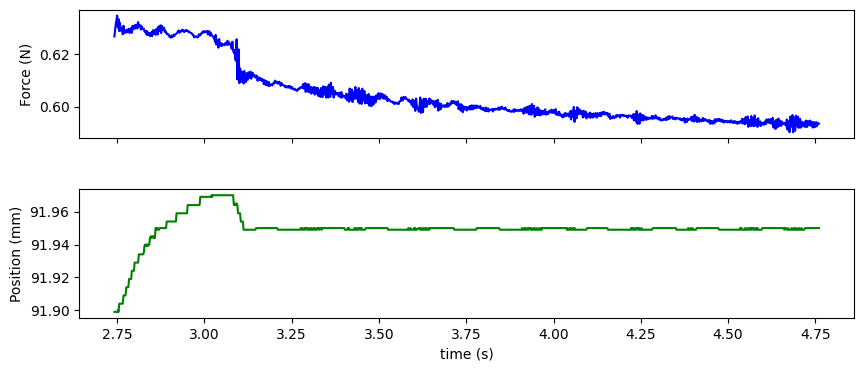

In [30]:
from DataParser import clean_df
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset/20250205_082609_HIST_006_CPXE_1.csv')
df = clean_df(df)
df = df[df['isTouching_SMAC'] == 1].copy()


# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# Plot Force (N) on top subplot
ax1.plot(df['t'], df['Fz'], color='blue', linewidth=1.5)
ax1.set_ylabel('Force (N)')

# Plot Position (mm) on bottom subplot
ax2.plot(df['t'], df['posz'], color='green', linewidth=1.5)
ax2.set_ylabel('Position (mm)')
ax2.set_xlabel('time (s)')

# Adjust layout
plt.subplots_adjust(hspace=0.4)  # Adjust space between plots
plt.show()

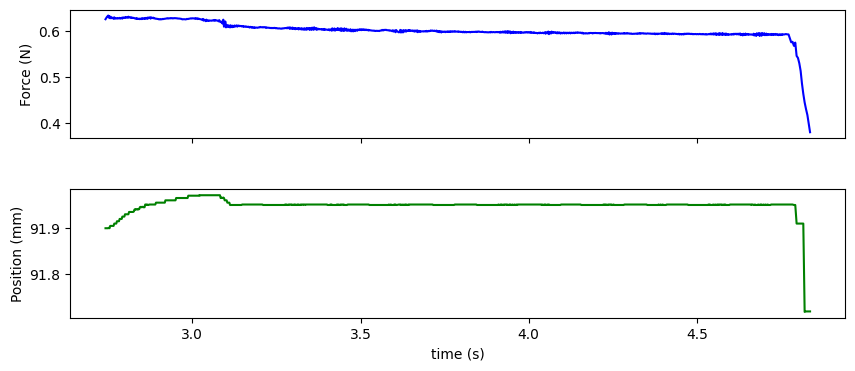

In [28]:
from DataParser import clean_df
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv('Dataset/20250205_082609_HIST_006_CPXE_1.csv')
df = clean_df(df)

# Find first instance of touching
first_touch_index = df[df['isTouching_SMAC'] == 1].index.min()

if pd.notna(first_touch_index):
    t_start = df.loc[first_touch_index, 't']
    df_filtered = df[(df['t'] >= t_start) & (df['t'] <= t_start + 2.1)].copy()

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

    # Plot Force (N) on top subplot
    ax1.plot(df_filtered['t'], df_filtered['Fz'], color='blue', linewidth=1.5)
    ax1.set_ylabel('Force (N)')

    # Plot Position (mm) on bottom subplot
    ax2.plot(df_filtered['t'], df_filtered['posz'], color='green', linewidth=1.5)
    ax2.set_ylabel('Position (mm)')
    ax2.set_xlabel('time (s)')

    # Adjust layout
    plt.subplots_adjust(hspace=0.4)  # Adjust space between plots
    plt.show()
else:
    print("No touching events detected in the dataset.")
